In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
import numpy as np
import pandas as pd

##Steps
0) Preprocess + EDA + Feature Selection<br>
1) Extraction Input and Output Column<br>
2) Scale the value<br>
3) Train Test Split<br>
4) Evaluate the model/model selection<br>
6) Deploy the model<br>

In [12]:
df = pd.read_csv('/content/placement.csv')

In [13]:
df.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [14]:
df.shape

(100, 4)

##1)Preprocessing

In [16]:
#in our data set there is one extra unnamed column and we are going to remove it

df = df.iloc[:,1:] # here we haver ignored the 0th column

df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

In [17]:
# EDA

import matplotlib.pyplot as plt


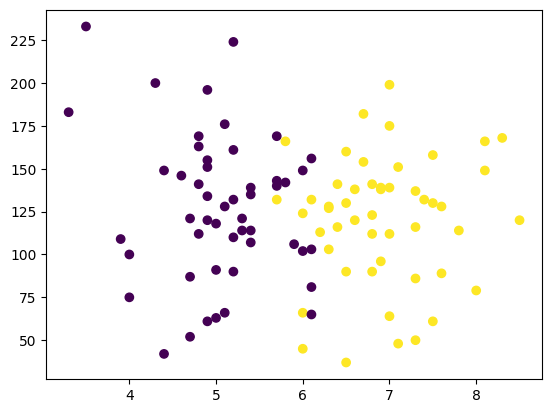

In [19]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

##2) Extract input and output column

In [25]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

print(X, X.shape,Y,Y.shape)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns] (100, 2) 0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64 (100,)


##4) Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)

print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

    cgpa     iq
37   8.1  149.0
26   7.0  199.0
81   5.4  107.0
54   6.4  141.0
1    5.9  106.0
..   ...    ...
11   6.9  138.0
32   7.0  139.0
86   5.1  128.0
40   4.9  134.0
93   6.8  112.0

[90 rows x 2 columns]
    cgpa     iq
62   6.0  102.0
17   3.3  183.0
16   5.2  224.0
72   7.3  116.0
59   4.8  112.0
69   8.5  120.0
10   6.0   45.0
68   4.0   75.0
56   6.1   65.0
48   6.6  138.0
37    1
26    1
81    0
54    1
1     0
     ..
11    1
32    1
86    0
40    0
93    1
Name: placement, Length: 90, dtype: int64
62    0
17    0
16    0
72    1
59    0
69    1
10    1
68    0
56    0
48    1
Name: placement, dtype: int64


##3)Scale the Values

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [35]:
X_train

array([[ 1.9056859 ,  0.64888667],
       [ 0.90055588,  1.95712593],
       [-0.56145141, -0.4500343 ],
       [ 0.35230315,  0.43956839],
       [-0.10457413, -0.47619909],
       [-1.29245506,  0.57039232],
       [-1.01832869, -1.65361442],
       [ 0.07817678, -1.13031872],
       [ 1.81431044, -1.18264829],
       [-0.56145141, -0.26688081],
       [ 1.17468225, -0.99949479],
       [-1.10970415,  0.43956839],
       [ 0.99193134, -1.99375663],
       [-1.01832869,  1.87863157],
       [-0.92695324, -1.60128485],
       [-1.2010796 , -1.88909749],
       [-0.28732504,  0.49189796],
       [-0.56145141,  0.38723882],
       [ 2.08843681,  1.14601759],
       [-1.47520597, -2.15074534],
       [ 1.2660577 ,  0.20408532],
       [ 0.4436786 ,  0.93669931],
       [-1.93208325, -0.39770473],
       [ 1.35743316,  0.88436974],
       [-1.10970415,  1.17218237],
       [-0.28732504,  0.41340361],
       [-0.19594959,  0.46573318],
       [-0.92695324, -0.86867087],
       [-0.74420232,

In [36]:
X_test = scaler.transform(X_test)

In [37]:
X_test

array([[-0.01319868, -0.58085823],
       [-2.48033598,  1.53848937],
       [-0.74420232,  2.61124556],
       [ 1.17468225, -0.21455124],
       [-1.10970415, -0.31921038],
       [ 2.27118772, -0.1098921 ],
       [-0.01319868, -2.07225098],
       [-1.84070779, -1.28730743],
       [ 0.07817678, -1.54895528],
       [ 0.53505406,  0.36107404]])

##4) Train Model

In [38]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression()

In [43]:
# model training

clf.fit(X_train,Y_train)

LogisticRegression()

In [44]:
clf.predict(X_test)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [45]:
#comparing prediction
y_pred = clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(Y_test,y_pred)

0.8

In [48]:
# plot dission model

In [49]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

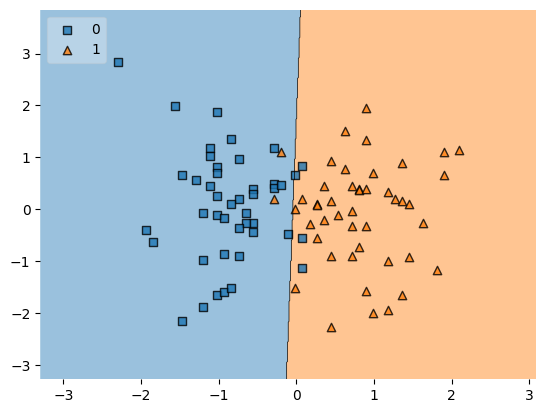

In [52]:
plot_decision_regions(X_train,Y_train.values, clf = clf, legend=2)

In [53]:
# downloding model to deploy in website

import pickle

In [57]:
# after running this line of code you will see on you files(on your left side of the screen),
# a mode.pkl file will be created and this .pkl is our ML model
pickle.dump(clf,open('model.pkl','wb'))